###  Линейная регрессия с градиентным спуском

**Градиентный спуск**  - нвзвание основного класса алгоритмов для минимизации большого числа функций. Алгоритм достигает этого путем начала движения из начального значения для переменных значений функции и затем итеративно двигаясь в сторону уменьшения функции стоимости или задаваемой метрики. Движение к наилучшему значению достигается путем взятия частных производныйх в направлении с наименьшим (определяемым расчетом) градиентом - это часть градиента.

Обыкновенная линейная регрессия хороший пример для демонстрации работы градиентного спуска
Пусть дано множество исходных точек, $y_i$, и множество точек предсказываемых моделью, $\hat{y}_i$,  :

$$\text{error}_{(m, b)} = \sum_{i=1}^n(y_i - \hat{y_i})$$

Наша задача состоит в минимизации этого значения. Добавляя модель линейной регрессии в записанное уравнение получаем выражение для оптимизации

$$\text{J} = \sum_{i=1}^n (y_i - (m x_i + b))^2$$


$$w_i = w_i -\alpha \frac{\partial J}{\partial w_i}$$

Форма линейной регрессии

$$ y = m*x +b $$

$$\Big< \frac{\partial}{\partial b}(\text{J}),  \frac{\partial}{\partial m}(\text{J}) \Big> = 
\Big< -2\sum_{i=1}^n(y_i - (mx_i + b)), -2\sum_{i=1}^n x_i(y_i - (mx_i +b)) \Big>$$

In [42]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, tolerance=None):
        self.learning_rate, self.iterations = learning_rate, iterations
        self.tolerance = tolerance
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        if self.tolerance:
            print(np.nansum(y - m*X + b, dtype=np.double) ** 2)
            while np.nansum(y - m*X + b, dtype=np.double) ** 2 > self.tolerance:
                b_gradient = -2 * np.sum(y - m*X + b) / n
                m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
                b = b + (self.learning_rate * b_gradient)
                m = m - (self.learning_rate * m_gradient)
        else:
            for _ in range(self.iterations):
                b_gradient = -2 * np.sum(y - m*X + b) / n
                m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
                b = b + (self.learning_rate * b_gradient)
                m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [43]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

-773.4807559752285


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

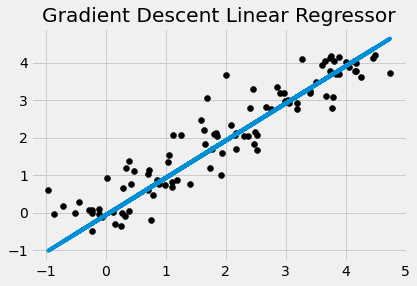

In [44]:
clf = GradientDescentLinearRegression(tolerance = 0.1)
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

In [45]:
clf.b

-0.06577746194694789

In [46]:
clf.m

0.9941878726863923

# Логистическая регрессия

In [79]:
from sklearn import datasets

In [83]:
iris = datasets.load_iris()

In [84]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [90]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [91]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [92]:
model.fit(X, y)

In [93]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [94]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

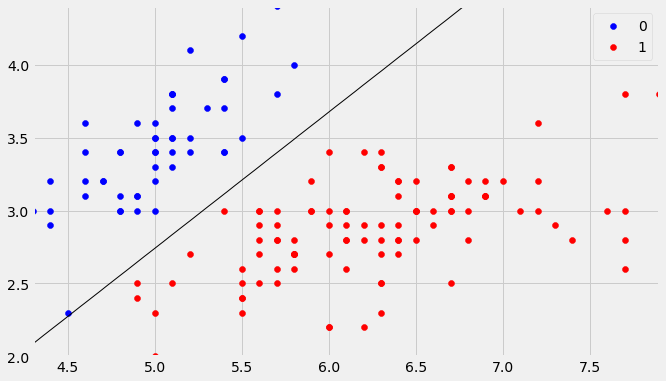

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [109]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions


Основное свойство метрического классификатора в том, что в данном случае не нужны признаки, а важна только функция расстояния.

Почему мы можем отказаться от признакового описания объектов?

На лекции по SVM будет получено следующее выражение для линейного классификатора:
$$
\hat{\mathbf{w}} = \sum_{i=1}^{l}\lambda_i\mathbf{x}_i,
$$
где $\mathbf{x}_i$ признаковое описание i-го объекта. Теперь, чтобы получить предсказания модели получаем:
$$
y = \text{sign}\bigr(\hat{\mathbf{w}}^{\mathsf{T}}\mathbf{x}\bigr) = \text{sign}\bigr(\sum_{i=1}^{l}\lambda_i  \color{red}{\mathbf{x}_i^{\mathsf{T}}\mathbf{x}}\bigr).
$$

Заметим, что скалярное произведение это не является метрикой, но идея того, что предсказания не зависит от признаков объектов, а только от некоторой числовой характеристики.

In [105]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=3, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

## Метод ближайшего соседа

In [106]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

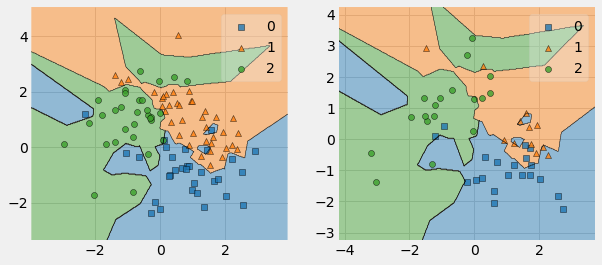

In [110]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])

plt.show()

## Метод k-ближайших соседей

In [111]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

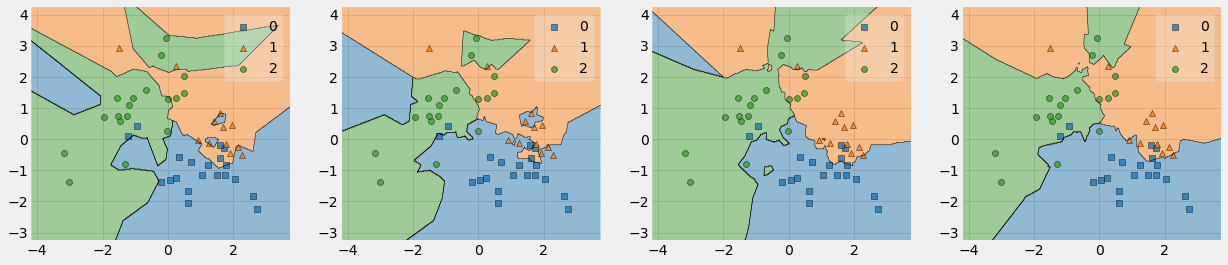

In [112]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

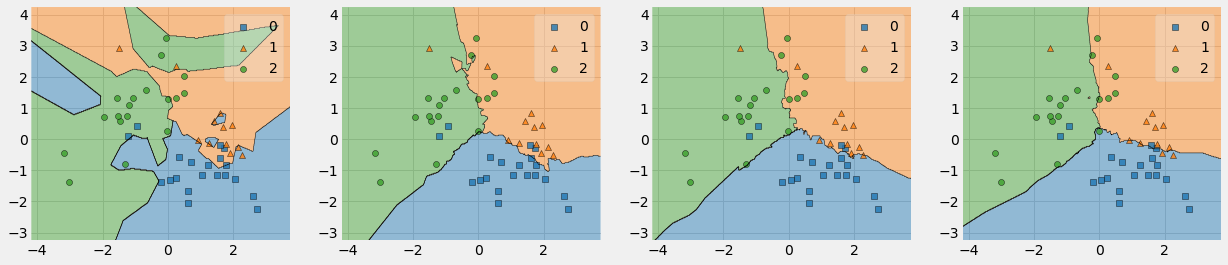

In [113]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод k-ближайших соседей с линейно убивающими весами

In [122]:
def K(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

In [123]:
models = []
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, 
                                 weights=K)
    model.fit(X_train, Y_train)
    models.append(model)

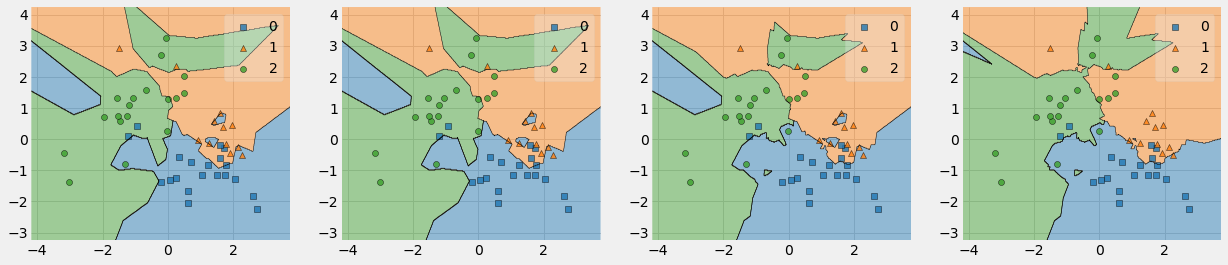

In [124]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

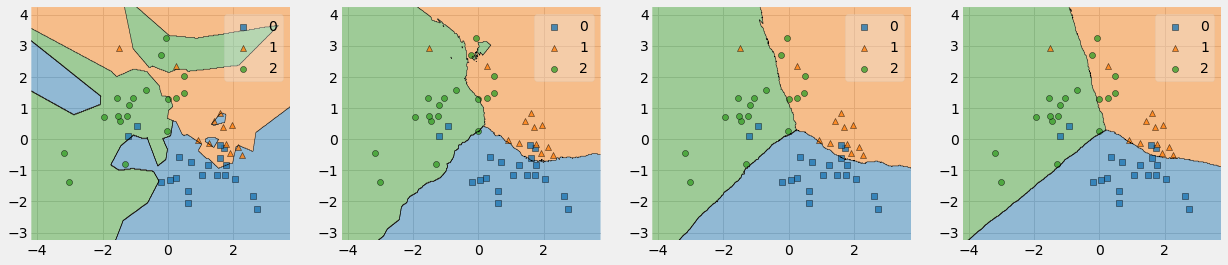

In [125]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод окна Парзена

In [126]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

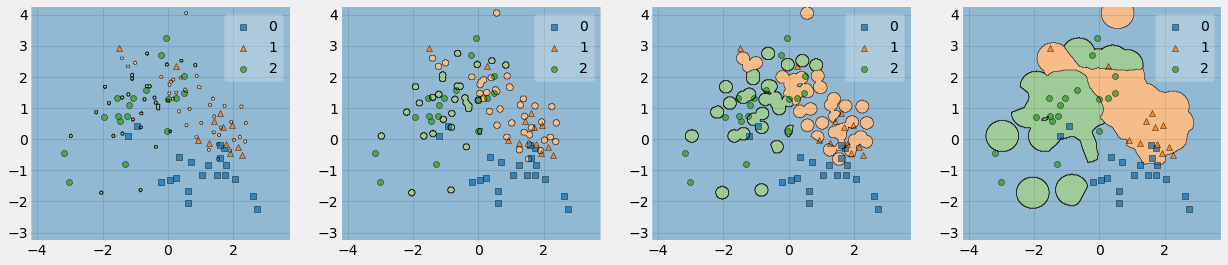

In [127]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

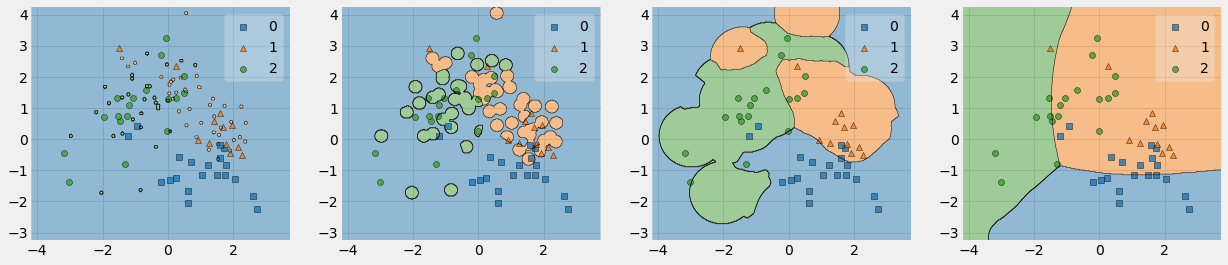

In [128]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 5.0]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()